In [1]:
from ca_utils import run_ca
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plotter(rule, steps, width, base=2, random=True, seed=0, decay=0.9):
    """
    Convenience function for plotting a comparison plot of the regular
    ca rule, and dervied causal region array
    
    Args:
        rule (int): Rule number
        steps (int): NUmber of update steps
        width (int): Width of state array
        base (int): Number of possible states
        random (bool): If `True` the initial state will be randomly generated
            if `False` then start from a single live cell
        seed (int): Random state generation seed
        decay (float): Decay applied to the summation at each step of the
            causal region calculation
    """
    
    # Run the model and get the phase space arrays
    actual, causal = run_ca(rule, 
                            steps, 
                            width, 
                            base=base, 
                            random=random, 
                            seed=seed, 
                            decay=decay)
    
    # Converts left distance to magnitude
    causal[:,:,0] = -causal[:,:,0]
    
    # These lines compress the 3rd dimension of the cauasl array
    num = causal[:,:,0]-causal[:,:,1]
    den = causal[:,:,0]+causal[:,:,1]
    arr = np.divide(num, den, out=np.zeros_like(den), where=den != 0 )
    
    # Plot the arrays side-by-side
    f, ax = plt.subplots(1, 2, figsize=(18, 10*(steps/width)))
    
    ax[0].matshow(actual[10:], cmap=plt.get_cmap('binary'));
    ax[1].matshow(arr[10:], cmap=plt.get_cmap('bone'));
    
    for i in ax:
        i.set_xticks([])
        i.set_yticks([])
  
    f.tight_layout()

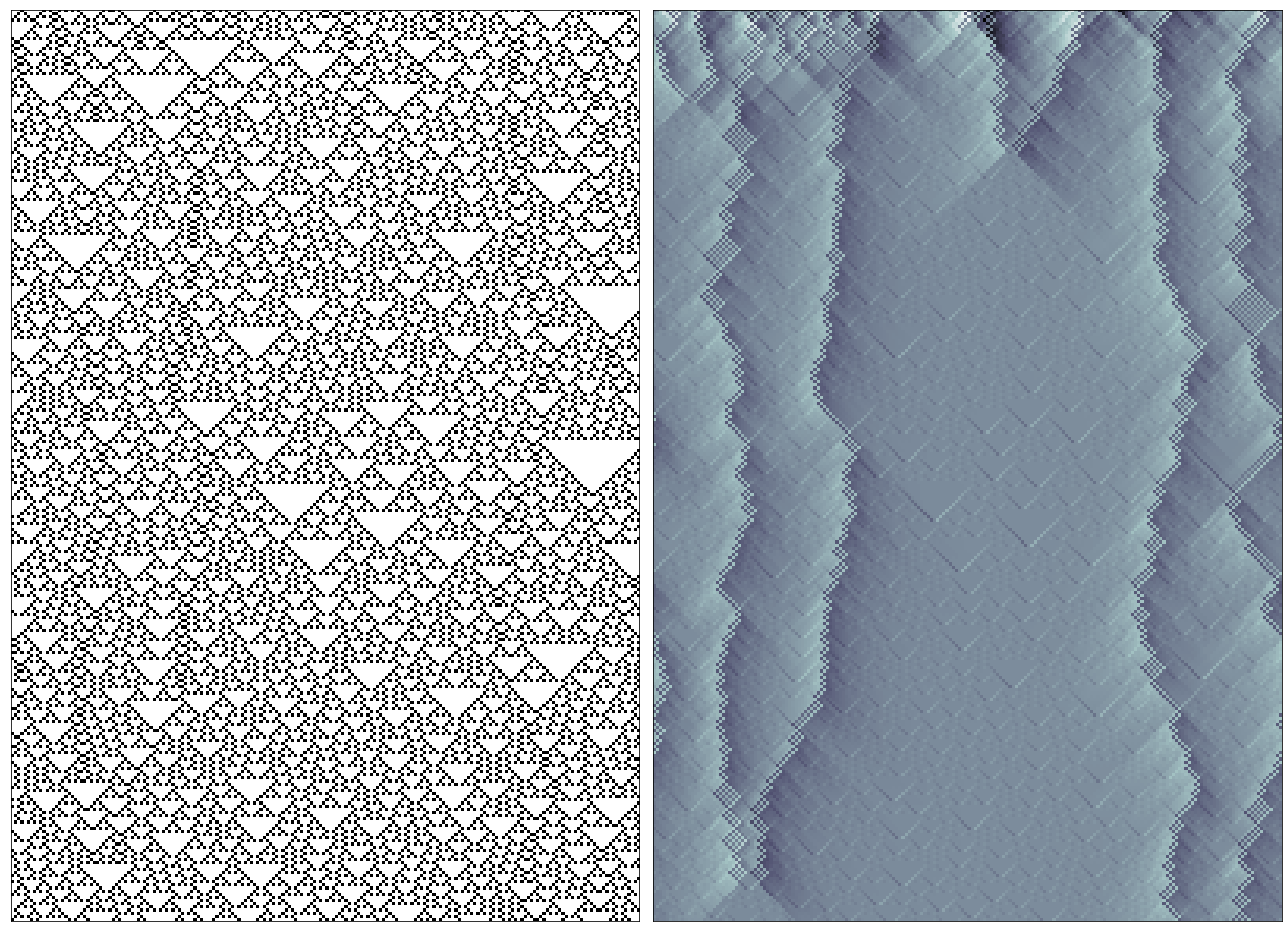

In [3]:
plotter(18, 300, 200)

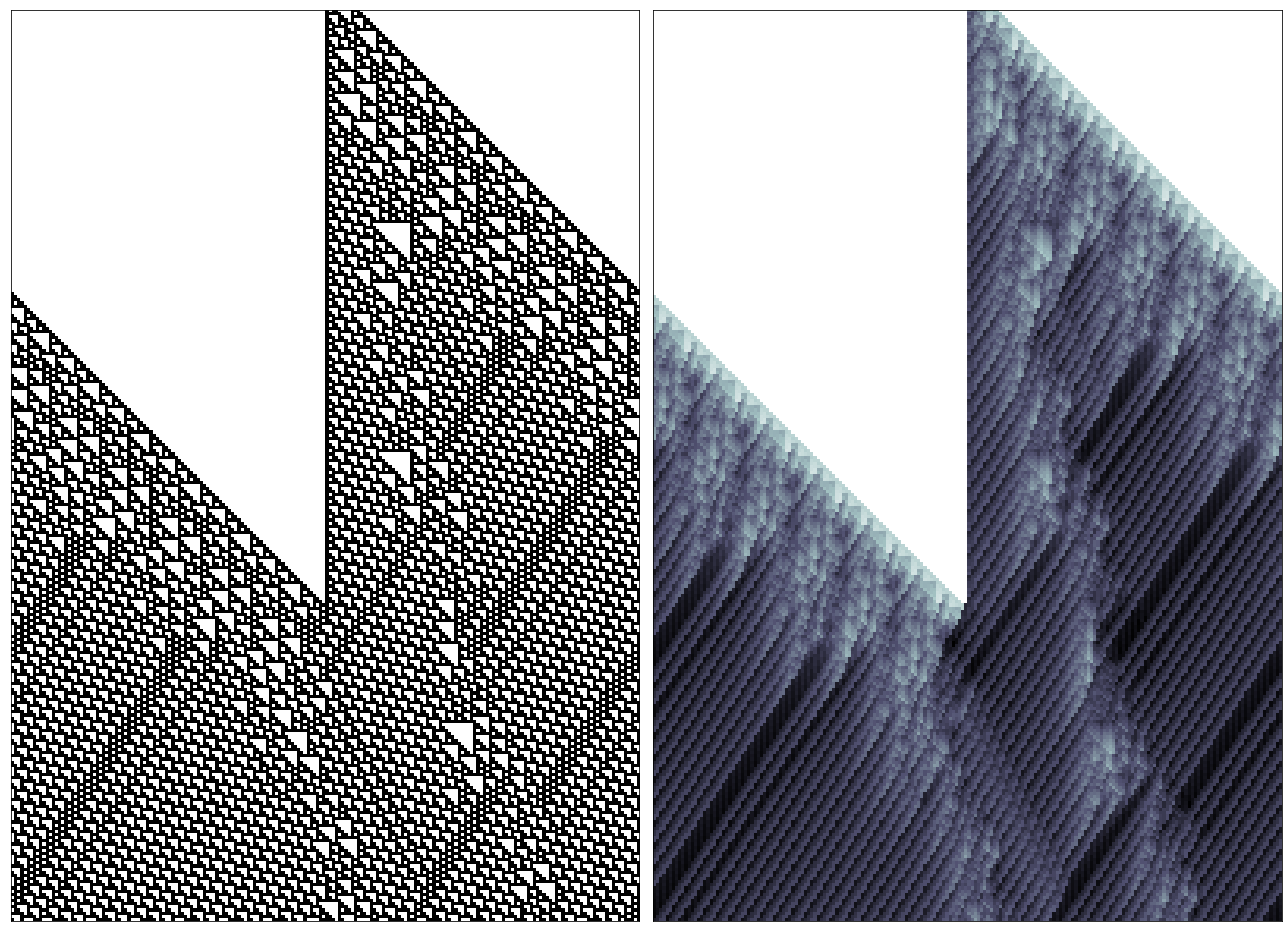

In [4]:
plotter(110, 300, 200, random=False)